<a href="https://colab.research.google.com/github/gami34/machine_learning/blob/master/ML_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finished training the model
[[211.30354]]


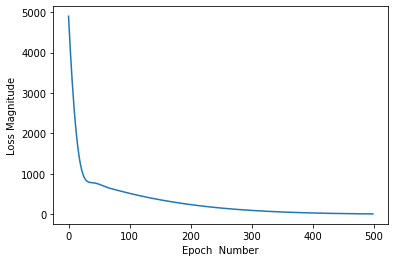

In [3]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np

celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

l0 = tf.compat.v1.keras.layers.Dense(units=1, input_shape=[1])

model = tf.compat.v1.keras.Sequential([l0])

model.compile(loss='mean_squared_error', optimizer=tf.compat.v1.keras.optimizers.Adam(0.1))

history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")


import matplotlib.pyplot as plt

plt.xlabel('Epoch  Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])


print(model.predict([100.0]))


In [0]:
print('These are the layer variables {}'.format(l0.get_weights()))

These are the layer variables [array([[1.8221744]], dtype=float32), array([29.109135], dtype=float32)]


In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [10]:
from __future__ import absolute_import, division, print_function

#import tensorflow and tensorflow datasets
import tensorflow_datasets as tfds

#Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'],dataset['test']

class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

2.2.0-rc2


In [11]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples 
print('Number of training examples {}'.format(num_train_examples))
print('Number of test examples {}'.format(num_test_examples))

Number of training examples 60000
Number of test examples 10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#the map function applies the normalise functin to each element
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

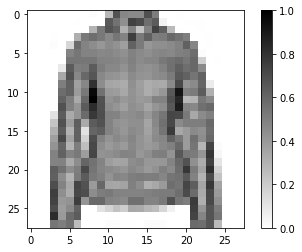

In [13]:
#Explore the process data
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

#plot the image - viola a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

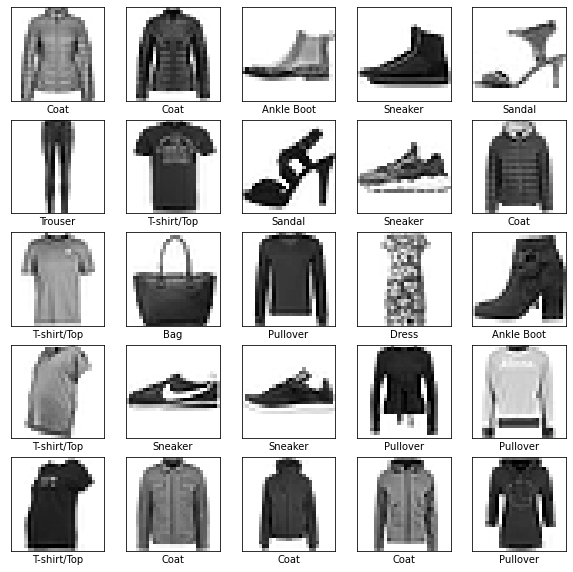

In [14]:
plt.figure(figsize=(10,10))
i= 0

for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1

plt.show()